In [1]:
import tensorflow

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(200,200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

In [3]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
'Train',
target_size=(200,200),batch_size=24,class_mode='categorical')

Found 870 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'Abbas': 0, 'Farooq': 1, 'Saeed': 2}

In [7]:
test_generator = test_datagen.flow_from_directory(
'Test',target_size=(200 , 200),
batch_size=24,
class_mode='categorical')

Found 216 images belonging to 3 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    'Validation',
     target_size=(200 , 200),batch_size=24,class_mode="categorical")

Found 388 images belonging to 3 classes.


In [9]:

history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
10/10 [==============================] - 32s 3s/step - loss: 0.9979 - acc: 0.5708 - val_loss: 0.8361 - val_acc: 0.5625
Epoch 2/10
10/10 [==============================] - 29s 3s/step - loss: 0.6974 - acc: 0.7793 - val_loss: 0.4999 - val_acc: 0.9417
Epoch 3/10
10/10 [==============================] - 29s 3s/step - loss: 0.4490 - acc: 0.8604 - val_loss: 0.4940 - val_acc: 0.8042
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 0.2356 - acc: 0.9500 - val_loss: 0.2283 - val_acc: 1.0000
Epoch 5/10
10/10 [==============================] - 31s 3s/step - loss: 0.1565 - acc: 0.9625 - val_loss: 0.1766 - val_acc: 0.9667
Epoch 6/10
10/10 [==============================] - 31s 3s/step - loss: 0.1407 - acc: 0.9875 - val_loss: 0.0533 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 31s 3s/step - loss: 0.0733 - acc: 0.9917 - val_loss: 0.0348 - val_acc: 1.0000
Epoch 8/10
10/

In [10]:
model.evaluate(test_generator)

9/9 [==============================] - 6s 714ms/step - loss: 0.1308 - acc: 0.9630


[0.1308377981185913, 0.9629629850387573]

In [26]:
model.save('faceClasification.h5')

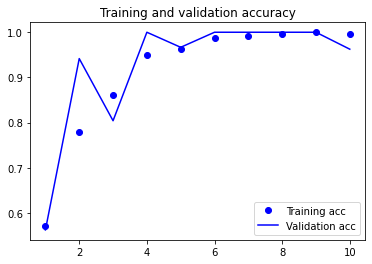

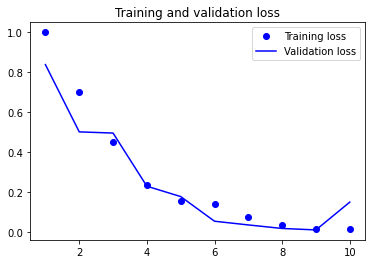

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [24]:
img = image.load_img("Test/Saeed/159.jpg", target_size=(200, 200))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [25]:
prediction

array([[3.8415811e-03, 4.4609956e-06, 9.9615389e-01]], dtype=float32)

In [20]:
img = image.load_img("Test/Farooq/98.jpg", target_size=(200, 200))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [21]:
prediction

array([[0.3833605 , 0.58267075, 0.03396869]], dtype=float32)

In [28]:
img = image.load_img("Test/Abbas/94.jpg", target_size=(200, 200))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [29]:
prediction

array([[9.9517846e-01, 2.8438974e-04, 4.5371321e-03]], dtype=float32)

In [31]:



# Face Recognition

# Importing the libraries
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from tensorflow.keras.models import load_model
import numpy as np

from tensorflow.keras.preprocessing import image
model = load_model('faceClasification.h5')

# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (200, 200))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
                     
        name="None matching"
        
        if(pred[0][0]>0.7):
            name='Abbas'
        elif(pred[0][1]>0.7):
            name='Farooq'
        elif(pred[0][2]>0.7):
            name='Saeed'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()


<>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-31-e241c3320f57>:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[1.000000e+00 4.887004e-28 0.000000e+00]]
[[1.00000e+00 3.60995e-10 0.00000e+00]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[2.3182967e-13 1.0000000e+00 0.0000000e+00]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
